### ✅ Task 1: Create Map Graph with 20 Segments
This section sets up the environment with 13 points and 20 path segments.

In [9]:

import networkx as nx
import matplotlib.pyplot as plt
import math

# Define Points
points = {'A': (-37.8156505, 145.2294636), 'B': (-37.815474, 145.2294588), 'C': (-37.8152886, 145.2288074), 'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805), 'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744), 'J': (-37.8136444, 145.2314192), 'K': (-37.814683, 145.2292295), 'L': (-37.8140991, 145.2303492), 'M': (-37.8148709, 145.2295034)}

# Define 20 Segments
segments = [('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80), ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150), ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43), ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)]

# Create Graph for Task 1
G_task1 = nx.Graph()
for point, (lat, lon) in points.items():
    G_task1.add_node(point, pos=(lon, lat))
for u, v, dist in segments:
    G_task1.add_edge(u, v, weight=dist)

print("Task 1 Segment Count:", len(G_task1.edges))


# --- Step 4: Define Euclidean Heuristic Function ---
def euclidean_heuristic(a, b):
    ax, ay = points[a][1], points[a][0]
    bx, by = points[b][1], points[b][0]
    return math.hypot(bx - ax, by - ay) * 100000  # Approximate meters

# --- Step 5: A* Algorithm Function ---
def a_star(graph, start, goal):
    open_set = [(0 + euclidean_heuristic(start, goal), 0, start, [])]
    visited = set()

    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == goal:
            return path, g

        for neighbor in graph.neighbors(current):
            weight = graph[current][neighbor]['weight']
            if neighbor not in visited:
                new_g = g + weight
                new_f = new_g + euclidean_heuristic(neighbor, goal)
                open_set.append((new_f, new_g, neighbor, path))
        open_set.sort()
    return None, float('inf')


# --- Step 6: Function to print path and distance ---
def print_astar_path(graph, start, goal):
    path, distance = a_star(graph, start, goal)
    if path:
        print(f"Path from {start} to {goal}: {' → '.join(path)}")
        print(f"Total Distance: {distance:.2f} meters\n")
    else:
        print(f"No path found from {start} to {goal}\n")

# --- Step 7: Test different start and end points ---
print_astar_path(G_task1, 'C', 'L')
print_astar_path(G_task1, 'F', 'K')
print_astar_path(G_task1, 'M', 'H')


Task 1 Segment Count: 20
Path from C to L: C → D → K → L
Total Distance: 188.00 meters

Path from F to K: F → E → D → K
Total Distance: 142.00 meters

Path from M to H: M → L → K → I → H
Total Distance: 303.00 meters



### ✅ Task 3.1: Expand Environment to 30 Segments
10 more path segments are added to the original 20 to make a total of 30.

Task 3 Segment Count: 30
Segment A-B: Distance=20m, Constraint=none
Segment A-M: Distance=128m, Constraint=none
Segment A-D: Distance=72m, Constraint=obstacle
Segment A-G: Distance=90m, Constraint=kerb_ramp
Segment B-C: Distance=65m, Constraint=slope
Segment B-E: Distance=78m, Constraint=kerb_ramp
Segment C-D: Distance=55m, Constraint=none
Segment C-G: Distance=43m, Constraint=slope
Segment C-E: Distance=60m, Constraint=slope
Segment D-E: Distance=19m, Constraint=obstacle
Segment D-K: Distance=43m, Constraint=none
Segment D-F: Distance=84m, Constraint=none
Segment E-F: Distance=80m, Constraint=slope
Segment E-G: Distance=57m, Constraint=obstacle
Segment F-G: Distance=45m, Constraint=kerb_ramp
Segment F-I: Distance=88m, Constraint=slope
Segment F-L: Distance=105m, Constraint=none
Segment G-H: Distance=95m, Constraint=obstacle
Segment G-I: Distance=61m, Constraint=kerb_ramp
Segment G-J: Distance=135m, Constraint=obstacle
Segment H-I: Distance=70m, Constraint=slope
Segment H-J: Distance=1

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_28712\916707243.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


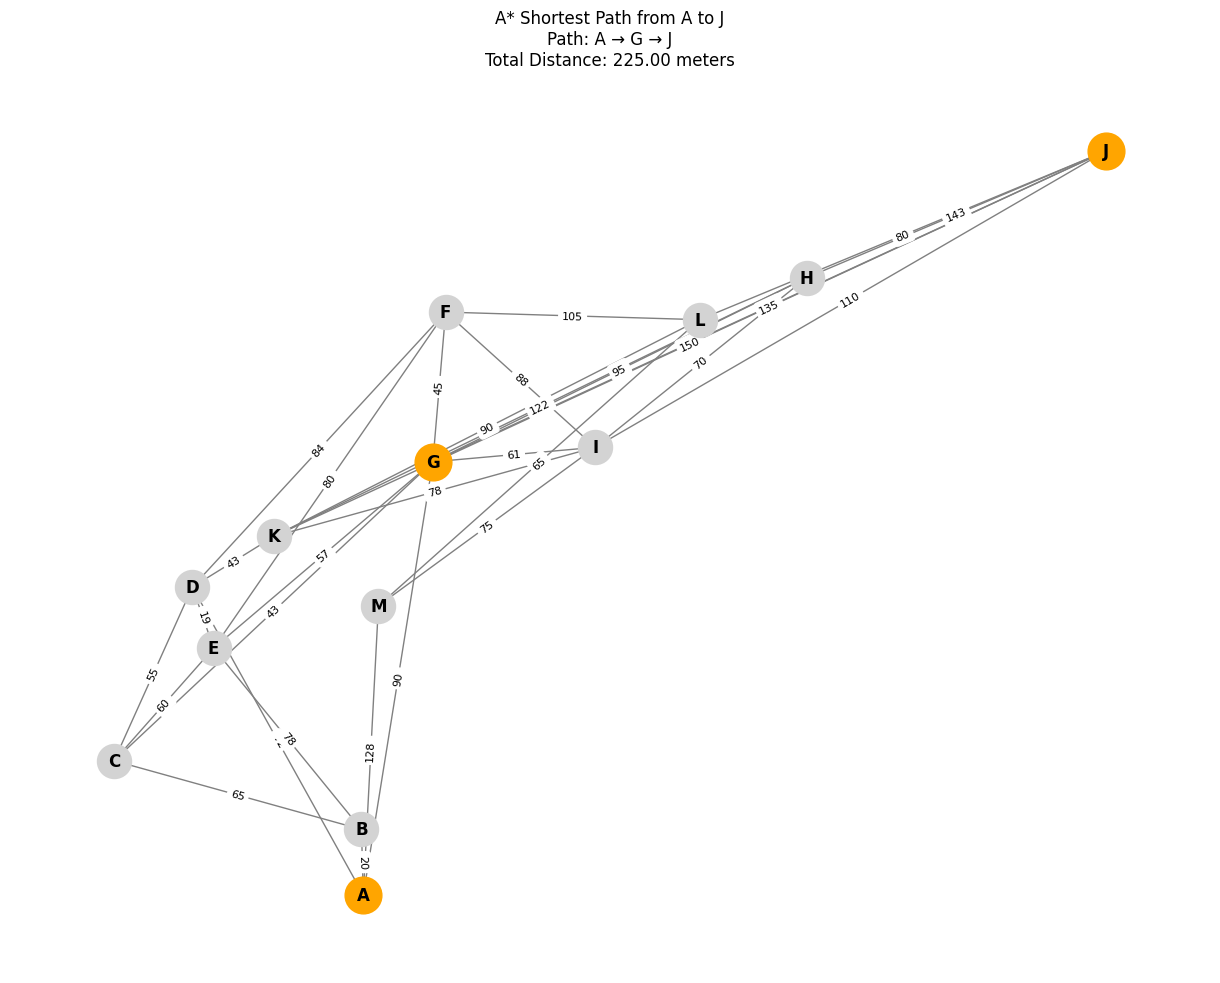

In [42]:

# Define 10 Additional Segments
new_segments = [('A', 'D', 72), ('B', 'E', 78), ('C', 'E', 60), ('D', 'F', 84), ('G', 'J', 135), ('H', 'K', 122), ('I', 'M', 75), ('J', 'L', 80), ('F', 'L', 105), ('A', 'G', 90)]

# Create Graph for Task 3
G_task3 = nx.Graph()
for point, (lat, lon) in points.items():
    G_task3.add_node(point, pos=(lon, lat))
for u, v, dist in segments + new_segments:
    G_task3.add_edge(u, v, weight=dist)

print("Task 3 Segment Count:", len(G_task3.edges))


# Task 3.2: Assign constraints to segments in G_task3
constraints = ['none', 'slope', 'none', 'obstacle', 'slope', 'kerb_ramp', 'obstacle', 'slope', 'kerb_ramp', 'none', 'slope', 'kerb_ramp', 'none', 'none', 'slope', 'obstacle', 'kerb_ramp', 'slope', 'none', 'none', 'obstacle', 'kerb_ramp', 'slope', 'none', 'obstacle', 'none', 'kerb_ramp', 'slope', 'none', 'kerb_ramp']
all_segments = [('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80), ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150), ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43), ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143), ('A', 'D', 72), ('B', 'E', 78), ('C', 'E', 60), ('D', 'F', 84), ('G', 'J', 135), ('H', 'K', 122), ('I', 'M', 75), ('J', 'L', 80), ('F', 'L', 105), ('A', 'G', 90)]
segment_with_constraints = list(zip(all_segments, constraints))

for ((u, v, dist), constraint) in segment_with_constraints:
    G_task3[u][v]['constraint'] = constraint

# Print example segment with constraint
for u, v in list(G_task3.edges):
    print(f"Segment {u}-{v}: Distance={G_task3[u][v]['weight']}m, Constraint={G_task3[u][v]['constraint']}")

# --- Step 7: Visualise the Map and Path ---
shortest_path, total_cost = a_star(G_task3, 'A', 'J')

plt.figure(figsize=(12, 9))
pos = nx.get_node_attributes(G_task3, 'pos')
nx.draw(G_task3, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=600, font_weight='bold')
nx.draw_networkx_edge_labels(G_task3, pos, edge_labels=nx.get_edge_attributes(G_task3, 'weight'), font_size=8)
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
nx.draw_networkx_nodes(G_task3, pos, nodelist=shortest_path, node_color='orange', node_size=700)
plt.title(f"A* Shortest Path from A to J\nPath: {' → '.join(shortest_path)}\nTotal Distance: {total_cost:.2f} meters")
plt.axis("off")
plt.tight_layout()
plt.show()

In [76]:

constraint_penalty = {
    'none': 0,
    'kerb_ramp': 15,
    'slope': 20,
    'obstacle': 50
}

def constraint_aware_heuristic(current, goal):
    base = euclidean_heuristic(current, goal)
    penalties = []
    for neighbor in G_task3.neighbors(current):
        constraint = G_task3[current][neighbor].get('constraint', 'none')
        penalties.append(constraint_penalty.get(constraint, 0))
    avg_penalty = sum(penalties) / len(penalties) if penalties else 0
    return base * avg_penalty
    

def a_star(graph, start, goal, heuristic_func):
    open_set = [(0 + heuristic_func(start, goal), 0, start, [])]
    visited = set()

    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == goal:
            return path, g

        if heuristic_func==constraint_aware_heuristic:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                constraint = graph[current][neighbor].get('constraint', 'none')
                cost = weight + constraint_penalty.get(constraint, 0)
                if neighbor not in visited:
                    new_g = g + cost
                    new_f = new_g + heuristic_func(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))
        else:
            for neighbor in graph.neighbors(current):
                weight = graph[current][neighbor]['weight']
                if neighbor not in visited:
                    new_g = g + weight
                    new_f = new_g + euclidean_heuristic(neighbor, goal)
                    open_set.append((new_f, new_g, neighbor, path))

        
        open_set.sort()
    return None, float('inf')

def compare_heuristics(start, goal):
    std_path, std_cost = a_star(G_task3, start, goal, euclidean_heuristic)
    con_path, con_cost = a_star(G_task3, start, goal, constraint_aware_heuristic)

    print(f"🔄 {start} to {goal}")
    print(f"Standard A* Path: {' → '.join(std_path)} | Cost: {round(std_cost, 2)}")
    print(f"Constraint-Aware A* Path: {' → '.join(con_path)} | Cost: {round(con_cost, 2)}\n")

# Test comparisons
compare_heuristics('A', 'J')
compare_heuristics('F', 'K')
compare_heuristics('C', 'L')
compare_heuristics('M', 'H')
compare_heuristics('B', 'I')


🔄 A to J
Standard A* Path: A → G → J | Cost: 225
Constraint-Aware A* Path: A → M → L → J | Cost: 308

🔄 F to K
Standard A* Path: F → D → K | Cost: 127
Constraint-Aware A* Path: F → D → K | Cost: 127

🔄 C to L
Standard A* Path: C → G → F → L | Cost: 193
Constraint-Aware A* Path: C → G → I → K → L | Cost: 327

🔄 M to H
Standard A* Path: M → I → H | Cost: 145
Constraint-Aware A* Path: M → L → K → H | Cost: 312

🔄 B to I
Standard A* Path: B → A → G → I | Cost: 171
Constraint-Aware A* Path: B → A → M → I | Cost: 238



# task 4